In [56]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.dammit import EncodingDetector
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from PIL import Image
from os import path, getcwd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

In [57]:
mental_health = 'https://www.medicalnewstoday.com/articles/154543'

In [58]:
def get_soup(html):
    '''get data from a webpage'''
    response = requests.get(html)
    http_encoding = response.encoding if 'charset' in response.headers.get('content-type', '').lower() else None
    html_encoding = EncodingDetector.find_declared_encoding(response.content, is_html=True)
    encoding = html_encoding or http_encoding
    soup = BeautifulSoup(response.content, from_encoding=encoding)
    return soup

In [59]:
soup_out = get_soup(mental_health)
soup_out

<!DOCTYPE html>
<html lang="en"><head>
<link as="script" crossorigin="anonymous" href="https://assets.medicalnewstoday.com/_next/vendor-ed641-legacy.js" rel="preload"/><link as="script" crossorigin="anonymous" href="https://assets.medicalnewstoday.com/_next/lib-df729-legacy.js" rel="preload"/><link as="script" crossorigin="anonymous" href="https://assets.medicalnewstoday.com/_next/72bafba9-f951-4386-bc52-b4c7536132a9/mnt/pages/tabbed.js-legacy.js" rel="preload"/>
<title>Mental health: Definition, common disorders, early signs, and more</title><link href="https://www.medicalnewstoday.com/articles/154543" rel="canonical"/><meta content="Mental health refers to people's cognitive, behavioral, and emotional well-being. We define mental health and explain the different disorders that may arise, as well as potential treatments." name="description"/><meta content="what is mental health" name="keywords"/><meta content="othermentalhealth" name="k1"/><meta content="mentalhealth" name="k2"/><meta

In [60]:
def get_links(soup):
    '''get links from a webpage'''
    http_links = [] 
    for link in soup.find_all('a', href=True):
        if link['href'][0] != '/': 
            http_links.append(link['href'].strip("'"))
    return http_links

In [61]:
links = get_links(soup_out)
links
html_links = links[6:]
html_links

['https://www.who.int/news-room/fact-sheets/detail/mental-health-strengthening-our-response',
 'https://www.nami.org/Learn-More/Mental-Health-By-the-Numbers',
 'https://www.nimh.nih.gov/health/statistics/prevalence/serious-mental-illness-smi-among-us-adults.shtml',
 'https://www.nimh.nih.gov/health/statistics/disability/us-leading-categories-of-diseases-disorders.shtml',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4764285/',
 'https://www.nimh.nih.gov/health/publications/looking-at-my-genes/index.shtml',
 'https://adaa.org/about-adaa/press-room/facts-statistics',
 'http://psychiatry.org/patients-families/anxiety-disorders/what-are-anxiety-disorders',
 'https://www.nimh.nih.gov/health/topics/bipolar-disorder/index.shtml',
 'https://www.medicalnewstoday.com/articles/324437',
 'https://www.nimh.nih.gov/health/topics/seasonal-affective-disorder/index.shtml',
 'https://www.medicalnewstoday.com/articles/10306',
 'https://www.nimh.nih.gov/health/topics/schizophrenia/index.shtml#part_145429

In [62]:
def get_paragraphs(soup):
    '''get <p> tags from webpage'''
    http_link_list = [] 
    for link in soup.find_all('p'):
        http_link_list.append(link.get_text())
    return http_link_list 

In [63]:
paragraphs = get_paragraphs(soup_out)
paragraphs

['Mental health refers to cognitive, behavioral, and emotional well-being. It is all about how people think, feel, and behave. People sometimes use the term “mental health” to mean the absence of a mental disorder.',
 'Mental health can affect daily living, relationships, and physical health. ',
 'However, this link also works in the other direction. Factors in people’s lives, interpersonal connections, and physical factors can all contribute to mental health disruptions. ',
 'Looking after mental health can preserve a person’s ability to enjoy life. Doing this involves reaching a balance between life activities, responsibilities, and efforts to achieve psychological resilience.',
 'Conditions such as stress, depression, and anxiety can all affect mental health and disrupt a person’s routine. ',
 'Although the term mental health is in common use, many conditions that doctors recognize as psychological disorders have physical roots.',
 'In this article, we explain what people mean by me

In [64]:

def get_episode_text(episode_list):
    """get text from all episodes in list"""
    text_return = []
    for i in episode_list:
        print(i)
        soup = get_soup(i)
        text_array = get_paragraphs(soup)
        full_text = get_text(text_array)
        text_return.append(full_text)
    return text_return

In [65]:
text_return_list = get_episode_text(html_links)
text_return_list

https://www.who.int/news-room/fact-sheets/detail/mental-health-strengthening-our-response
https://www.nami.org/Learn-More/Mental-Health-By-the-Numbers
https://www.nimh.nih.gov/health/statistics/prevalence/serious-mental-illness-smi-among-us-adults.shtml
https://www.nimh.nih.gov/health/statistics/disability/us-leading-categories-of-diseases-disorders.shtml
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4764285/
https://www.nimh.nih.gov/health/publications/looking-at-my-genes/index.shtml
https://adaa.org/about-adaa/press-room/facts-statistics
http://psychiatry.org/patients-families/anxiety-disorders/what-are-anxiety-disorders
https://www.nimh.nih.gov/health/topics/bipolar-disorder/index.shtml
https://www.medicalnewstoday.com/articles/324437
https://www.nimh.nih.gov/health/topics/seasonal-affective-disorder/index.shtml
https://www.medicalnewstoday.com/articles/10306
https://www.nimh.nih.gov/health/topics/schizophrenia/index.shtml#part_145429
https://www.medicalnewstoday.com/articles/ultra-p

['Mental health is an integral and essential component of health. The WHO constitution states: "Health is a state of complete physical, mental and social well-being and not merely the absence of disease or infirmity." An important implication of this definition is that mental health is more than just the absence of mental disorders or disabilities. Mental health is a state of well-being in which an individual realizes his or her own abilities, can cope with the normal stresses of life, can work productively and is able to make a contribution to his or her community. Mental health is fundamental to our collective and individual ability as humans to think, emote, interact with each other, earn a living and enjoy life. On this basis, the promotion, protection and restoration of mental health can be regarded as a vital concern of individuals, communities and societies throughout the world. Multiple social, psychological, and biological factors determine the level of mental health of a pers

In [66]:
def get_text(text_array):
    '''get text from an array'''
    text = " ".join(text_array)
    return text

In [67]:
all_text = get_text(text_return_list)
all_text

'Mental health is an integral and essential component of health. The WHO constitution states: "Health is a state of complete physical, mental and social well-being and not merely the absence of disease or infirmity." An important implication of this definition is that mental health is more than just the absence of mental disorders or disabilities. Mental health is a state of well-being in which an individual realizes his or her own abilities, can cope with the normal stresses of life, can work productively and is able to make a contribution to his or her community. Mental health is fundamental to our collective and individual ability as humans to think, emote, interact with each other, earn a living and enjoy life. On this basis, the promotion, protection and restoration of mental health can be regarded as a vital concern of individuals, communities and societies throughout the world. Multiple social, psychological, and biological factors determine the level of mental health of a perso

In [68]:
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

True

In [69]:
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

In [ ]:
filtered_text = punctuation_stop(all_text)
filtered_text

In [71]:
text = " ".join([word for word in filtered_text])
text

'mental health integral essential component health the who constitution states health state complete physical mental social merely absence disease infirmity an important implication definition mental health absence mental disorders disabilities mental health state individual realizes abilities cope normal stresses life work productively able make contribution community mental health fundamental collective individual ability humans think emote interact earn living enjoy life on basis promotion protection restoration mental health regarded vital concern individuals communities societies throughout world multiple social psychological biological factors determine level mental health person point time for example violence persistent pressures recognized risks mental health the clearest evidence associated sexual violence poor mental health also associated rapid social change stressful work conditions gender discrimination social exclusion unhealthy lifestyle physical human rights violations

In [75]:
from google.colab import files
uploaded = files.upload()

Saving InShot_20200706_072458795.jpg to InShot_20200706_072458795 (1).jpg


In [76]:
mask_pic = np.array(Image.open('InShot_20200706_072458795.jpg'))

In [77]:
unwanted = ['person','may','study','research','diabetes','people','cell','often','website','article','range','make','time',
            'national institute','often','including','an','the','asthma','well','food', 'likely', 'scientist', 'learn', 'type', 
            'important', 'week', 'common', 'called', 'cells', 'might', 'researcher', 'doctor', 'year', 'tend', 'general', 'nami',
            'used', 'called']

stopwords = set(STOPWORDS)
stopwords.update(unwanted)

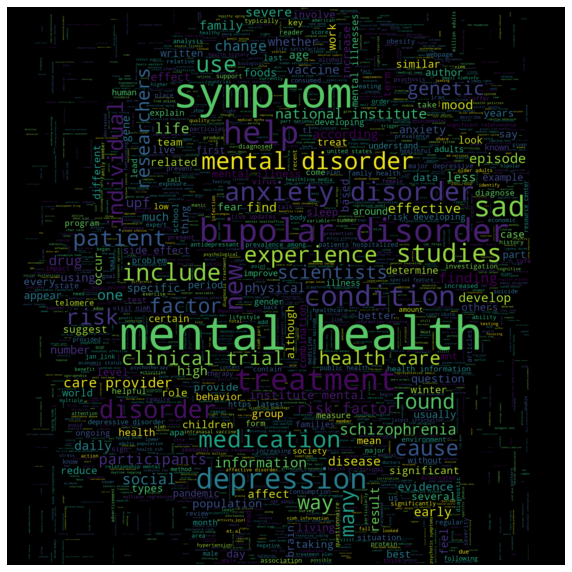

In [79]:
wc = WordCloud(stopwords=stopwords, mask=mask_pic, max_words=2000, max_font_size=256,
               random_state=42, width=mask_pic.shape[1], height=mask_pic.shape[0])
wc.generate(text)

plt.figure(figsize=(10, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [80]:
wc.to_file('mental_health2.png')


In [81]:
files.download('mental_health2.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>